In [6]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# split the paragraph into lines and store them in list
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [9]:
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [43]:
input_sequences = []

for line in corpus:
    # token_list takes every line of sentences and will be refreshed everytime it loops
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        # n_gram_sequence will save the first nth word from token_list and 
        # will iterate until it reaches the finial word in that sentence
        n_gram_sequence = token_list[:i+1]
        # input_sequences will save all the word sequence of n_gram_sequence until the for loop ends
        input_sequences.append(n_gram_sequence)

print(token_list)
print(n_gram_sequence)
print(input_sequences)
print(input_sequences[1])

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

# create predictors and label
# this line of code will get 
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


[1, 26, 61, 60, 262, 13, 9, 10]
[1, 26, 61, 60, 262, 13, 9, 10]
[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 8

In [37]:
# get the toeknized word index of a specified word
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [11]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [12]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [23]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 15s 33ms/sample - loss: 5.5696 - accuracy: 0.0287
Epoch 2/500
453/453 [==============================] - 0s 199us/sample - loss: 5.5484 - accuracy: 0.0486
Epoch 3/500
453/453 [==============================] - 0s 225us/sample - loss: 5.5020 - accuracy: 0.0486
Epoch 4/500
453/453 [==============================] - 0s 207us/sample - loss: 5.3381 - accuracy: 0.0486
Epoch 5/500
453/453 [==============================] - 0s 207us/sample - loss: 5.1417 - accuracy: 0.0486
Epoch 6/500
453/453 [==============================] - 0s 205us/sample - loss: 5.0693 - accuracy: 0.0486
Epoch 7/500
453/453 [==============================] - 0s 203us/sample - loss: 5.0282 - accuracy: 0.0530
Epoch 8/500
453/453 [==============================] - 0s 207us/sample - loss: 4.9942 - accuracy: 0.0552
Epoch 9/500
453/453 [==============================] - 0s 216us/sample - loss: 4.9609 - accuracy: 0.0618
Epoch 10/500
453/453 [============

453/453 [==============================] - 0s 252us/sample - loss: 2.6692 - accuracy: 0.4525
Epoch 79/500
453/453 [==============================] - 0s 216us/sample - loss: 2.6425 - accuracy: 0.4415
Epoch 80/500
453/453 [==============================] - 0s 212us/sample - loss: 2.6279 - accuracy: 0.4481
Epoch 81/500
453/453 [==============================] - 0s 199us/sample - loss: 2.6022 - accuracy: 0.4525
Epoch 82/500
453/453 [==============================] - 0s 196us/sample - loss: 2.5890 - accuracy: 0.4503
Epoch 83/500
453/453 [==============================] - 0s 194us/sample - loss: 2.5690 - accuracy: 0.4636
Epoch 84/500
453/453 [==============================] - 0s 205us/sample - loss: 2.5492 - accuracy: 0.4636
Epoch 85/500
453/453 [==============================] - 0s 205us/sample - loss: 2.5271 - accuracy: 0.4636
Epoch 86/500
453/453 [==============================] - 0s 203us/sample - loss: 2.5063 - accuracy: 0.4768
Epoch 87/500
453/453 [==============================] - 0s 

453/453 [==============================] - 0s 247us/sample - loss: 1.4010 - accuracy: 0.7682
Epoch 155/500
453/453 [==============================] - 0s 207us/sample - loss: 1.4024 - accuracy: 0.7461
Epoch 156/500
453/453 [==============================] - 0s 252us/sample - loss: 1.3888 - accuracy: 0.7594
Epoch 157/500
453/453 [==============================] - 0s 254us/sample - loss: 1.3584 - accuracy: 0.7682
Epoch 158/500
453/453 [==============================] - 0s 260us/sample - loss: 1.3591 - accuracy: 0.7594
Epoch 159/500
453/453 [==============================] - 0s 276us/sample - loss: 1.3471 - accuracy: 0.7704
Epoch 160/500
453/453 [==============================] - 0s 223us/sample - loss: 1.3941 - accuracy: 0.7439
Epoch 161/500
453/453 [==============================] - 0s 194us/sample - loss: 1.3502 - accuracy: 0.7748
Epoch 162/500
453/453 [==============================] - 0s 207us/sample - loss: 1.3160 - accuracy: 0.7770
Epoch 163/500
453/453 [============================

453/453 [==============================] - 0s 201us/sample - loss: 0.7204 - accuracy: 0.9139
Epoch 231/500
453/453 [==============================] - 0s 203us/sample - loss: 0.7146 - accuracy: 0.9139
Epoch 232/500
453/453 [==============================] - 0s 199us/sample - loss: 0.7054 - accuracy: 0.9161
Epoch 233/500
453/453 [==============================] - 0s 192us/sample - loss: 0.6992 - accuracy: 0.9139
Epoch 234/500
453/453 [==============================] - 0s 199us/sample - loss: 0.6956 - accuracy: 0.9117
Epoch 235/500
453/453 [==============================] - 0s 194us/sample - loss: 0.6889 - accuracy: 0.9095
Epoch 236/500
453/453 [==============================] - 0s 196us/sample - loss: 0.6817 - accuracy: 0.9161
Epoch 237/500
453/453 [==============================] - 0s 201us/sample - loss: 0.6798 - accuracy: 0.9139
Epoch 238/500
453/453 [==============================] - 0s 201us/sample - loss: 0.6694 - accuracy: 0.9183
Epoch 239/500
453/453 [============================

453/453 [==============================] - 0s 201us/sample - loss: 0.3892 - accuracy: 0.9470
Epoch 307/500
453/453 [==============================] - 0s 207us/sample - loss: 0.4271 - accuracy: 0.9294
Epoch 308/500
453/453 [==============================] - 0s 205us/sample - loss: 0.4518 - accuracy: 0.9272
Epoch 309/500
453/453 [==============================] - 0s 201us/sample - loss: 0.5051 - accuracy: 0.8985
Epoch 310/500
453/453 [==============================] - 0s 196us/sample - loss: 0.6513 - accuracy: 0.8631
Epoch 311/500
453/453 [==============================] - 0s 196us/sample - loss: 0.5574 - accuracy: 0.8962
Epoch 312/500
453/453 [==============================] - 0s 199us/sample - loss: 0.5123 - accuracy: 0.9029
Epoch 313/500
453/453 [==============================] - 0s 199us/sample - loss: 0.5038 - accuracy: 0.9095
Epoch 314/500
453/453 [==============================] - 0s 207us/sample - loss: 0.4601 - accuracy: 0.9227
Epoch 315/500
453/453 [============================

453/453 [==============================] - 0s 199us/sample - loss: 0.2584 - accuracy: 0.9492
Epoch 383/500
453/453 [==============================] - 0s 201us/sample - loss: 0.2495 - accuracy: 0.9470
Epoch 384/500
453/453 [==============================] - 0s 194us/sample - loss: 0.2469 - accuracy: 0.9514
Epoch 385/500
453/453 [==============================] - 0s 201us/sample - loss: 0.2444 - accuracy: 0.9470
Epoch 386/500
453/453 [==============================] - 0s 203us/sample - loss: 0.2419 - accuracy: 0.9492
Epoch 387/500
453/453 [==============================] - 0s 221us/sample - loss: 0.2398 - accuracy: 0.9492
Epoch 388/500
453/453 [==============================] - 0s 205us/sample - loss: 0.2393 - accuracy: 0.9536
Epoch 389/500
453/453 [==============================] - 0s 243us/sample - loss: 0.2382 - accuracy: 0.9492
Epoch 390/500
453/453 [==============================] - 0s 232us/sample - loss: 0.2362 - accuracy: 0.9470
Epoch 391/500
453/453 [============================

453/453 [==============================] - 0s 232us/sample - loss: 0.1860 - accuracy: 0.9536
Epoch 459/500
453/453 [==============================] - 0s 278us/sample - loss: 0.1815 - accuracy: 0.9514
Epoch 460/500
453/453 [==============================] - 0s 271us/sample - loss: 0.1793 - accuracy: 0.9514
Epoch 461/500
453/453 [==============================] - 0s 203us/sample - loss: 0.1771 - accuracy: 0.9492
Epoch 462/500
453/453 [==============================] - 0s 225us/sample - loss: 0.1751 - accuracy: 0.9492
Epoch 463/500
453/453 [==============================] - 0s 280us/sample - loss: 0.1768 - accuracy: 0.9514
Epoch 464/500
453/453 [==============================] - 0s 271us/sample - loss: 0.1740 - accuracy: 0.9514
Epoch 465/500
453/453 [==============================] - 0s 223us/sample - loss: 0.1731 - accuracy: 0.9514
Epoch 466/500
453/453 [==============================] - 0s 247us/sample - loss: 0.1720 - accuracy: 0.9536
Epoch 467/500
453/453 [============================

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

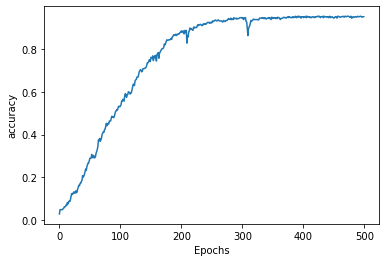

In [25]:
plot_graphs(history, 'accuracy')

In [80]:
seed_text = "Laurence went to dublin"

# setting the number of words that we are going to predict
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    print(token_list)
    # predict the token of the next word
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    
    # look up in the reverse index to look up the token back into a word
    # and add that to the sequence
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

[2]
[26]
[50]
[115]
[4]
[49]
[35]
[79]
[1115]
[29]
[136]
[1968]
[22]
[22]
[124]
[2]
[306]
[646]
[7]
[22]
[22]
[22]
[22]
[124]
[2]
[263]
[447]
[45]
[8]
[567]
[447]
[447]
[447]
[22]
[447]
[447]
[447]
[447]
[2285]
[82]
[3]
[124]
[7]
[447]
[968]
[447]
[447]
[819]
[447]
[124]
[124]
[368]
[64]
[64]
[192]
[2251]
[436]
[2617]
[22]
[447]
[22]
[124]
[19]
[124]
[276]
[469]
[868]
[447]
[2471]
[124]
[459]
[2]
[1864]
[7]
[22]
[225]
[22]
[2]
[7]
[22]
[55]
[2]
[14]
[55]
[14]
[447]
[447]
[813]
[447]
[64]
[22]
[459]
[124]
[2]
[192]
[447]
[22]
[447]
[447]
[383]
Laurence went to dublin and will come him to never no more remember they may steer love love gone and singing stars my love love love love gone and around sinking now in raise sinking sinking sinking love sinking sinking sinking sinking pail had i gone my sinking flag sinking sinking dim sinking gone gone alas our our irish gown bride underfoot love sinking love gone but gone ones fear runaway sinking londons gone hours and morgan my love rocky lo

In [30]:
a = np.array([1,2,3,4,5,6,7])
print(a[:2])

[1 2]


In [44]:
# ***********************practice 2**************************

In [45]:
import tensorflow as tf
import urllib.request

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [47]:
website = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt'

with urllib.request.urlopen(website) as url:
    data = url.read()
    print(data) # print out the url source code

data = data.decode()

b'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy 

In [48]:
print(data)

Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My true harp shall praise sing onl

In [59]:
tokenizer = Tokenizer()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [73]:
input_sentences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for words in range(1,len(corpus)):
        n_gram = token_list[:i+1]
        input_sentences.append(n_gram)

# pad sequence
max_input_sentences = max([len(x) for x in input_sentences])
input_sentences = np.array(pad_sequences(input_sentences, maxlen=max_input_sentences, padding='pre'))

# create input and output
xs, label = input_sentences[:,:-1], input_sentences[:,-1]
# change the label into same length
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [51]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [52]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [53]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [54]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [55]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 14s 1ms/sample - loss: 6.6871 - accuracy: 0.0749
Epoch 2/100
12038/12038 [==============================] - 5s 384us/sample - loss: 5.7734 - accuracy: 0.1094
Epoch 3/100
12038/12038 [==============================] - 5s 388us/sample - loss: 4.9795 - accuracy: 0.1572
Epoch 4/100
12038/12038 [==============================] - 5s 384us/sample - loss: 4.1007 - accuracy: 0.2287
Epoch 5/100
12038/12038 [==============================] - 5s 388us/sample - loss: 3.2693 - accuracy: 0.3140
Epoch 6/100
12038/12038 [==============================] - 5s 393us/sample - loss: 2.5513 - accuracy: 0.4271
Epoch 7/100
12038/12038 [==============================] - 5s 389us/sample - loss: 2.0198 - accuracy: 0.5278
Epoch 8/100
12038/12038 [==============================] - 5s 406us/sample - loss: 1.6168 - accuracy: 0.6172 - loss: 1.5797 
Epoch 9/100
12038/12038 [==============================] - 4s 361us/sample - loss: 1.3487 

12038/12038 [==============================] - 4s 349us/sample - loss: 0.7298 - accuracy: 0.8017
Epoch 76/100
12038/12038 [==============================] - 4s 349us/sample - loss: 0.7395 - accuracy: 0.7992
Epoch 77/100
12038/12038 [==============================] - 4s 347us/sample - loss: 0.7681 - accuracy: 0.7927
Epoch 78/100
12038/12038 [==============================] - 4s 350us/sample - loss: 0.7656 - accuracy: 0.7911
Epoch 79/100
12038/12038 [==============================] - 4s 347us/sample - loss: 0.8090 - accuracy: 0.7805
Epoch 80/100
12038/12038 [==============================] - 4s 349us/sample - loss: 0.8511 - accuracy: 0.7725
Epoch 81/100
12038/12038 [==============================] - 4s 348us/sample - loss: 0.8357 - accuracy: 0.7760
Epoch 82/100
12038/12038 [==============================] - 4s 350us/sample - loss: 0.8340 - accuracy: 0.7749
Epoch 83/100
12038/12038 [==============================] - 4s 349us/sample - loss: 0.8285 - accuracy: 0.7791
Epoch 84/100
12038/1203

In [74]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

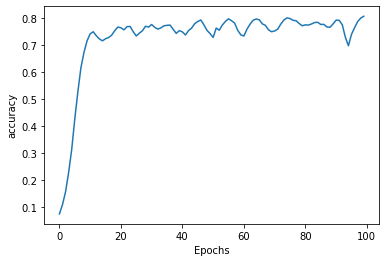

In [75]:
plot_graphs(history, 'accuracy')

In [58]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this proud old woman did say did say there was bacon and tea fellows of trinity love love eyes glisten love sends gone she love gone by and women sinking sinking lightly murray gone who is counting but sinking prisoner and sinking love sinking sinking sinking sinking pail shakes me and love my love me gone and shes gone hours love terrance mccarthy gone hours my wind is hat like politicians haunt my love return my love and die my love wind nor sinking alive alive o alive sinking cries they call gone but they slept had gone and sinking love
